In [2]:
import math
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_substract(x,y):
    """adds the corresponding elements in the two vectors"""
    return [x_i - y_i for x_i, y_i in zip(x,y)]

def dot_product(x,y):
    """computes the dot product of the two vectors"""
    return sum(x_i * y_i for x_i, y_i in zip(x,y))

def squared_sum(x):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot_product(x,x)

def l2_norm(x):
    return math.sqrt(squared_sum(x))

def euclidian_distance(x,y):
    return l2_norm(vector_substract(x,y))

In [3]:
#function to be optimized
def sum_of_squares(v):
    """computes the sum of squared elements of the vector v"""
    return sum(v_i**2 for v_i in v)


In [4]:
def difference_quotient(f,x,h):
    return (f(x + h)- f(x)) / h

In [5]:
def step(v, direction, step_size):
    """move step size in the direction from v"""
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v,(direction))]

In [6]:
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

In [7]:
#pick a random point
import random

v = [random.randint(-10,10) for i in range(3)]
print(v)
tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) # compute the gradient at v
    next_v = step(v, gradient, -0.0001)
    if euclidian_distance(next_v, v) < tolerance:
        break
    v = next_v

print(v)

[-1, -1, 10]
[-4.9507253083454684e-05, -4.9507253083454684e-05, 0.0004950725308345518]


In [8]:
def safe(f):
    """return a new function that is the same as f,
    exept that it ouputs infinity whenever f produces and error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [9]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes the target function"""
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                      for step_size in step_sizes]
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        #stop if we are converging
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value
        

In [10]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

In [11]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [12]:
def error(alpha, beta, x_i, y_i):
    """the error from predicting beta * x_i + alpha when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

In [13]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [14]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

In [27]:
def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),
            -2 * error(alpha, beta, x_i, y_i) * x_i]

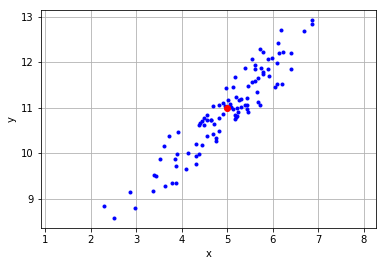

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)
theta = [random.random(), random.random()]
num_samples = 100
# The mean values of x and y .
mu = np.array([5, 11])
# The desired covariance matrix.
cov = np.array([
        [  1., 0.95],
        [ 0.95,  1.,]
    ])
# Generate the random samples.
df = np.random.multivariate_normal(mu, cov, size=num_samples)
# Plot various projections of the samples.
plt.plot(df[:,0], df[:,1], 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

In [34]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points        
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_substract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

In [35]:
theta = [random.random(), random.random()]
print(theta)
alpha,beta = minimize_stochastic(squared_error,
                                 squared_error_gradient,
                                 df[:,0],
                                 df[:,1],
                                 theta,
                                 0.01
                                )
print(alpha,beta)

[0.898173121357879, 0.9230824398201768]
6.246885932557279 0.9420702196478743


In [36]:
yhat = [predict(alpha,beta, x_i) for x_i in df[:,0]]

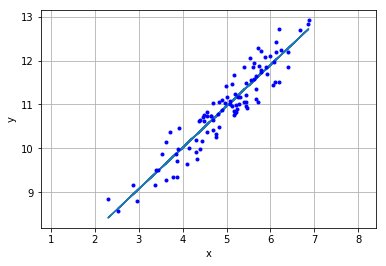

In [37]:
plt.plot(df[:,0],yhat)
plt.plot(df[:,0], df[:,1], 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()